In [98]:
#3 layer neural network
#consisted of initial,hidden, and final layer

import numpy as np
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

In [99]:
class neuralNetwork:
    def __init__(self,initialNodes,hiddenNodes,finalNodes,learningRate):
        self.inodes = initialNodes
        self.hnodes = hiddenNodes
        self.fnodes = finalNodes
        
        #link weight matrices, wih and whf
        #w11 w21
        #w12 w22
        
        self.wih = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.whf = np.random.normal(0.0,pow(self.fnodes,-0.5),(self.fnodes,self.hnodes))
        
        self.lr = learningRate
        self.activationFunction = lambda x: scipy.special.expit(x)
        
        pass
    
    def query(self,inputs_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list,ndmin=2).T
        
        hidden_outputs = self.activationFunction(np.dot(self.wih,inputs))
        final_outputs = self.activationFunction(np.dot(self.whf,hidden_outputs))
        
        return final_outputs
    
    def train(self,inputs_list,targets_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list,ndmin=2).T
        
        #convert targets list to 2d array
        targets = np.array(targets_list,ndmin=2).T
        
        #calculate signals into final output layer
        hidden_outputs = self.activationFunction(np.dot(self.wih,inputs))
        final_outputs = self.activationFunction(np.dot(self.whf,hidden_outputs))
        
        #output errors is target - actual
        final_errors = targets - final_outputs
        #hidden layer error is the final_error, split by weights, recombined at hidden nodes                                        
        hidden_errors = np.dot(self.whf.T,final_errors)
        
        #update the weights for link between hidden and final layers
        self.whf += self.lr * np.dot((final_errors*final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))                                    
        #update the weights for link between initial and final layers
        self.wih += self.lr * np.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),np.transpose(inputs))
                                                
        pass

In [100]:
#number of initial, hidden, and final nodes
initialNodes = 120
hiddenNodes = 5
finalNodes = 2

#learning rate
learningRate = 0.2

#create instance of neural network
n = neuralNetwork(initialNodes,hiddenNodes,finalNodes,learningRate)

#load the wave training data CSV file into a list
training_data_file=open('training_data.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()

#train the neural network

#epoch is the number of times the training data is used for training
epochs = 3

for e in range(epochs):
    for record in training_data_list:
        #split the record by the ','comma
        all_values = record.split(';')
        #input must be in 0 < input <= 1
        inputs = (np.asfarray(all_values[1:]))
        #create the target output values(all 0.01, except the desired label which is 0.99)
        targets = np.zeros(finalNodes) + 0.01
        #all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass
    pass

In [101]:
#load the wave training test CSV file into a list
test_data_file=open('test_data.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[1].split(';')
#print the label
print(all_values[0])

0


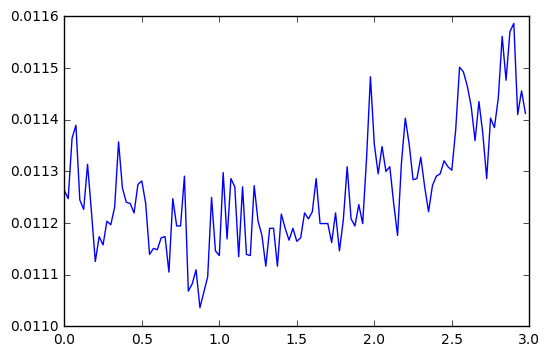

In [102]:
sampling_rate = 0.025
number_of_samples = 120

t = np.arange(0,sampling_rate*number_of_samples,sampling_rate)
plt.plot(t,all_values[1:])

In [103]:
n.query(np.asfarray(all_values[1:]))

array([[ 0.06559942],
       [ 0.0675243 ]])